In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
iris = pd.read_csv('IRIS Flower.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploration

In [6]:
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


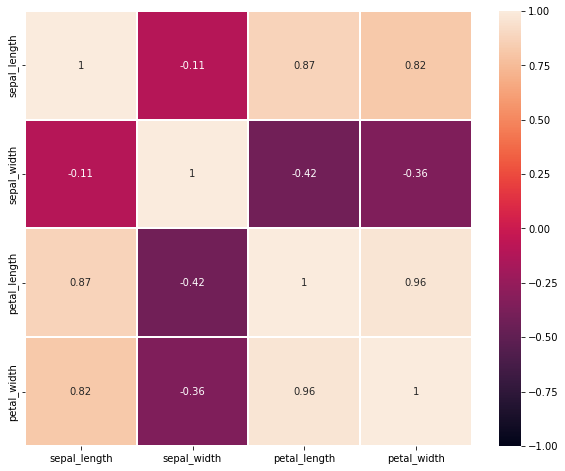

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), vmin=-1.0, vmax=1.0, annot=True, linewidths=2)
plt.show()

We can observe a strong positive correlation between petal length and petal width, as well as a strong positive correlation between sepal length and petal length, and another strong positive correlation between sepal length and petal width. If we were dealing with a huge dataset containing a large number of features, we could employ a dimensionality reduction algorithm to eliminate redundant features. However, given the small size of this dataset, it is advisable to retain all the features.

In [8]:
iris.groupby('species').describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

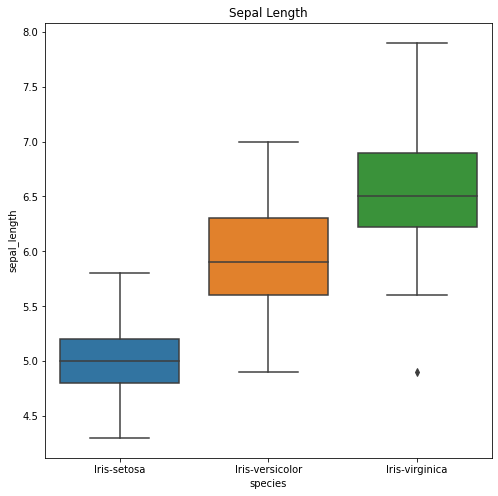

In [9]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="species", y="sepal_length", data=iris).set_title('Sepal Length')
plt.show()

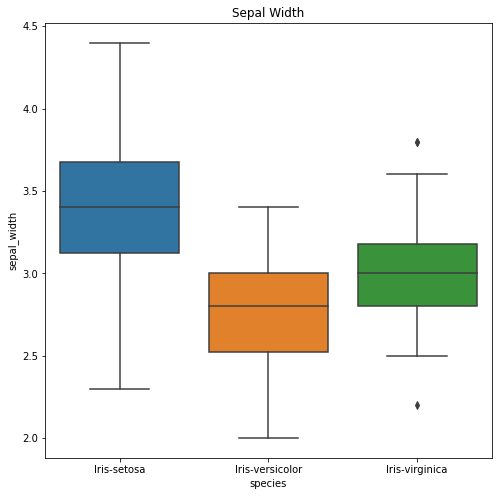

In [10]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="species", y="sepal_width", data=iris).set_title('Sepal Width')
plt.show()

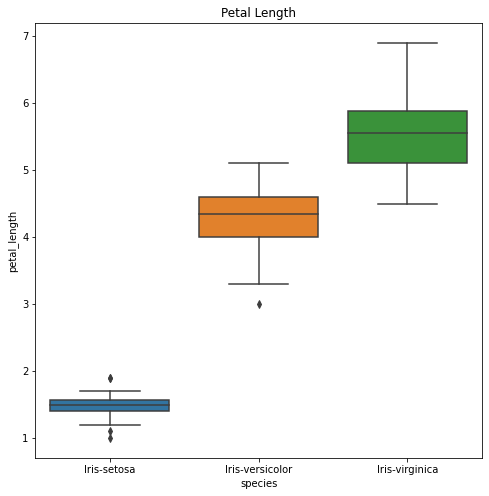

In [11]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="species", y="petal_length", data=iris).set_title('Petal Length')
plt.show()

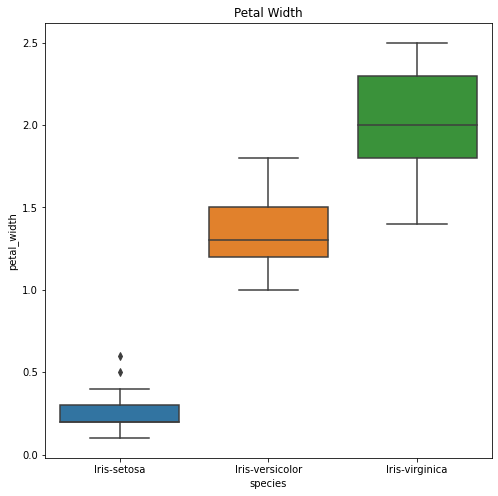

In [12]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="species", y="petal_width", data=iris).set_title('Petal Width')
plt.show()

From the four graphs above, we can observe a significant disparity in the distribution of data, particularly for sepal length, petal length, and petal width, while the variance in sepal width appears comparatively less pronounced. Given these observations, a decision tree algorithm appears to be a sensible choice for modeling the problem.

# Modeling

In [13]:
# We take 80% of data into training, and 20% into test
# For each set, a third belonds to each type of Iris

training = pd.concat([iris[:40], iris[50:90], iris[100:140]])
test = pd.concat([iris[40:50], iris[90:100], iris[140:]])
training_X = training[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
training_y = training['species']
test_X  = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
test_y = test['species']

In [14]:
print('Training set:', training_X.shape)
print('Test set:', test_X.shape)

Training set: (120, 4)
Test set: (30, 4)


We will employ a couple of classification algorithms on the dataset to assess their performance:

- Logistic Regression
- Decision Tree
- K Nearest Neighbor (KNN)
- Support Vector Machine (SVM)

**Logistic Regression**

In [15]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=200).fit(training_X, training_y)
print('Training accuracy:', LR_classifier.score(training_X, training_y))
print('Test accuracy:', LR_classifier.score(test_X, test_y))

Training accuracy: 0.975
Test accuracy: 1.0


**Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier
dTree_classifier = DecisionTreeClassifier(criterion="entropy").fit(training_X, training_y)
print('Training accuracy:', dTree_classifier.score(training_X, training_y))
print('Test accuracy:', dTree_classifier.score(test_X, test_y))

Training accuracy: 1.0
Test accuracy: 1.0


**K Nearest Neighbor(KNN)**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier().fit(training_X, training_y)
print('Training accuracy:', KNN_classifier.score(training_X, training_y))
print('Test accuracy:', KNN_classifier.score(test_X, test_y))

Training accuracy: 0.9666666666666667
Test accuracy: 1.0


**Support Vector Machine**

In [18]:
from sklearn.svm import LinearSVC
SVC_classifier = LinearSVC(multi_class='crammer_singer', max_iter=3000).fit(training_X, training_y)
SVC_classifier.score(training_X, training_y)
print('Training accuracy:', SVC_classifier.score(training_X, training_y))
print('Test accuracy:', SVC_classifier.score(test_X, test_y))

Training accuracy: 0.975
Test accuracy: 1.0


C:\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


All four algorithms perform flawlessly on the test set, achieving 100% accuracy. We can now utilize these algorithms to predict the type of Iris based on new measurements.

# Visualization

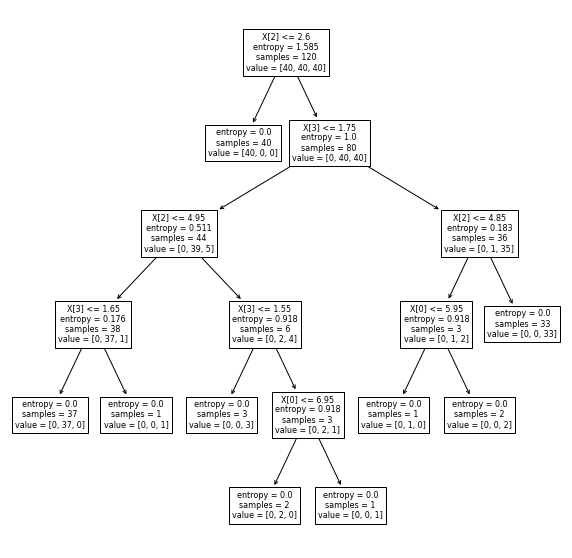

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dTree_classifier)
plt.show()